In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import geopandas as gp
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [2]:
ds = pd.read_csv('32_Murder_victim_age_sex.csv')
ds

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,Tamil Nadu,2010,Murder - Total Victims,3. Total,327.0,1908,13.0,63.0,16.0,650.0,839.0
1014,Tripura,2010,Murder - Total Victims,3. Total,24.0,159,2.0,0.0,0.0,60.0,73.0
1015,Uttar Pradesh,2010,Murder - Total Victims,3. Total,344.0,4456,82.0,138.0,126.0,2358.0,1408.0
1016,Uttarakhand,2010,Murder - Total Victims,3. Total,19.0,176,1.0,NaN,2.0,91.0,63.0


In [3]:
ds.isnull().sum()

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

In [4]:
# We are assuming that the missing values are those with no victim or crime committed. 
#so replacing it with 0.
ds.fillna(0,inplace = True)   

In [5]:

ds.isnull().sum()

Area_Name                 0
Year                      0
Group_Name                0
Sub_Group_Name            0
Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    0
Victims_Upto_30_50_Yrs    0
dtype: int64

In [6]:
ds.Victims_Upto_30_50_Yrs.sum()

276150.0

In [7]:
ds.Sub_Group_Name.replace('2. Female Victims', 'Female Victims', inplace = True )
ds.Sub_Group_Name.replace('1. Male Victims', 'Male Victims' , inplace = True )
ds.Sub_Group_Name.replace('3. Total', '(Female + Male) Victims' , inplace = True )

In [8]:
ds

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,Female Victims,0.0,6,0.0,0.0,0.0,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,Tamil Nadu,2010,Murder - Total Victims,(Female + Male) Victims,327.0,1908,13.0,63.0,16.0,650.0,839.0
1014,Tripura,2010,Murder - Total Victims,(Female + Male) Victims,24.0,159,2.0,0.0,0.0,60.0,73.0
1015,Uttar Pradesh,2010,Murder - Total Victims,(Female + Male) Victims,344.0,4456,82.0,138.0,126.0,2358.0,1408.0
1016,Uttarakhand,2010,Murder - Total Victims,(Female + Male) Victims,19.0,176,1.0,0.0,2.0,91.0,63.0


In [9]:
ds.groupby('Area_Name')[ 'Victims_Total'].agg(['sum']).sort_values('sum',
                                                        ascending = False)

,sum
Area_Name,
Uttar Pradesh,117620
Bihar,69350
Maharashtra,57386
Andhra Pradesh,54962
Madhya Pradesh,47388
West Bengal,33918
Karnataka,33782
Tamil Nadu,33752
Jharkhand,31364


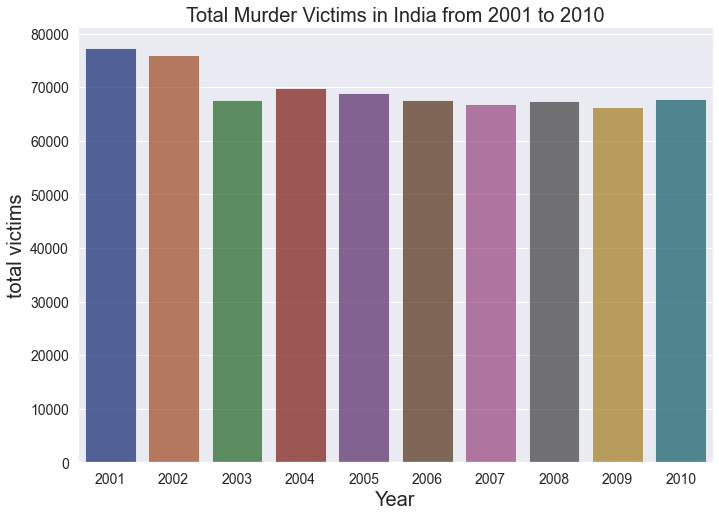

In [10]:
plt.figure(figsize = (25,8))
df = ds.groupby('Year')['Victims_Total'].agg(['sum']).sort_values('sum', ascending = False)
plt.subplot(1,2,1)
sb.barplot(x = df.index , y = df['sum'], data = df ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('total victims', fontsize =  20)
plt.xlabel('Year' , fontsize = 20)
plt.title('Total Murder Victims in India from 2001 to 2010', fontsize = 20 )
plt.show()

Total victims decreased considerably from 2002 to 2003, and then the decreasing trend of murders is not
significant till 2010.

In [11]:
def groupby_chart( by, col, **kwargs):
    plt.figure(figsize = (25,9.5))
    y_label = kwargs.get('y_label', None)
    title =  kwargs.get('title', None)
    df = ds.groupby(by)[col].agg(['sum']).sort_values('sum', ascending = False)
    plt.subplot(1,2,1)
    sb.barplot(y = df.index , x = df['sum'], data = df, palette= 'dark', alpha = 0.7)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel('' , fontsize =  20)
    plt.xlabel('total victims' , fontsize = 20)
    plt.title(title, fontsize = 20 )
    

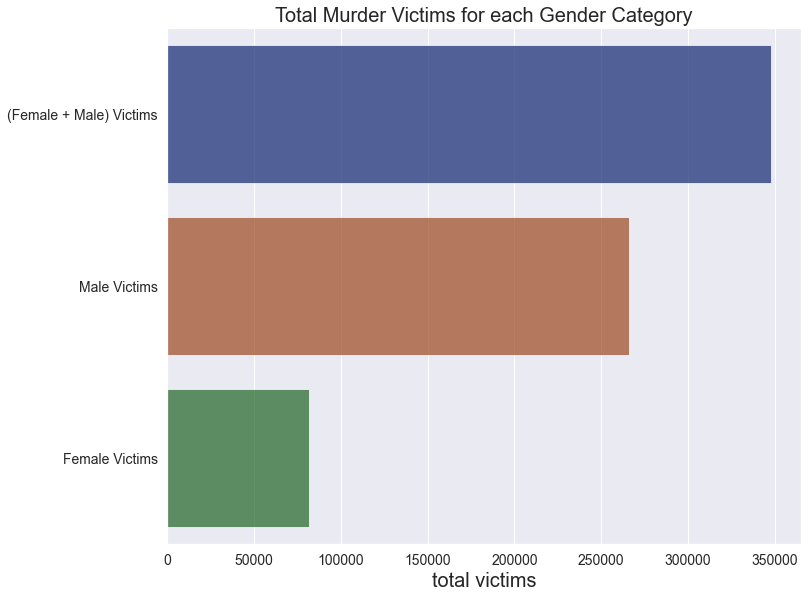

In [12]:
groupby_chart('Sub_Group_Name', 'Victims_Total', 
             title = 'Total Murder Victims for each Gender Category')

Here we see higher total male victims then female, probably due to high male to female ratio in india.

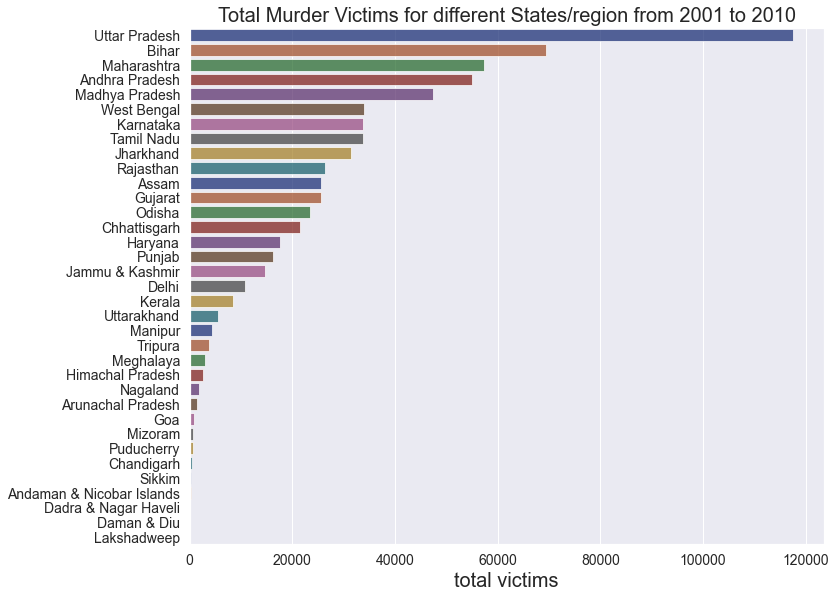

In [13]:
groupby_chart('Area_Name', 'Victims_Total',
              title = 'Total Murder Victims for different States/region from 2001 to 2010')

Here Uttar Pradesh tops the chart of highest murder victims, roughly 70% more then that of Bihar(2nd highest State in murder case).

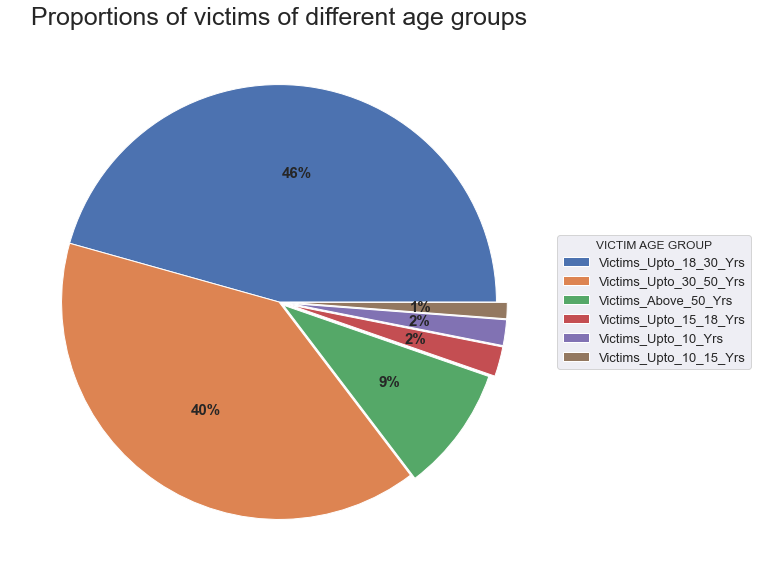

In [14]:
victim_by_age_list = ['Victims_Above_50_Yrs','Victims_Upto_10_15_Yrs','Victims_Upto_10_Yrs',
                     'Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs']
sum_list = []
for col in victim_by_age_list:
    s = ds[col].sum()
    sum_list.append((col, s))
sum_list
sum_dict = dict(sum_list)
sum_dict
age_group_victims = pd.Series(sum_dict).sort_values(ascending = False)

plt.figure(figsize = (20,10))
wedges, texts, autotexts = plt.pie(age_group_victims, radius = 1,
       autopct ='%0.0f%%', explode = [0,0,0.025,0.05,0.05,0.05], textprops={'fontsize': 50})
plt.legend(wedges,age_group_victims.index,
          title="VICTIM AGE GROUP",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop = {'size':13}, fontsize = 50)
plt.setp(autotexts, size = 15, weight="bold")
plt.title('Proportions of victims of different age groups', fontsize = 25 )
plt.show()

Here, the most vulnerable age group is 18-30 years and followed by 30-50 years. We also see 2% victims in age-group upto 10 years to which we shall further look into later on.

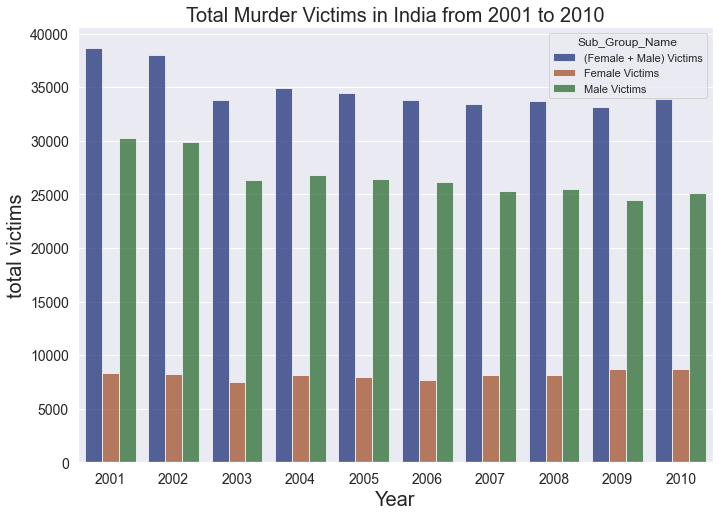

In [15]:
plt.figure(figsize = (25,8))
df = ds.groupby(['Year','Sub_Group_Name'])['Victims_Total'].agg(['sum']).reset_index()[['Year',
                                                                    'Sub_Group_Name','sum']]
plt.subplot(1,2,1)
sb.barplot(x = 'Year' , y = 'sum', hue = 'Sub_Group_Name' ,data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('total victims', fontsize =  20)
plt.xlabel('Year' , fontsize = 20)
plt.title('Total Murder Victims in India from 2001 to 2010', fontsize = 20 )
plt.show()

Here we can see the there is no significant variations of total victims from either groups since 2003 to 2010.

In [16]:
# changing 'Area_Name' to match with names of shp file.
ds['Area_Name'].loc[ds['Area_Name'] == 'Andaman & Nicobar Islands'] = 'Andaman & Nicobar Island'
ds['Area_Name'].loc[ds['Area_Name'] == 'Arunachal Pradesh']  = 'Arunanchal Pradesh'
ds['Area_Name'].loc[ds['Area_Name'] == 'Dadra & Nagar Haveli']  = 'Dadara & Nagar Havelli'
ds['Area_Name'].loc[ds['Area_Name'] == 'Delhi']  = 'NCT of Delhi'

In [17]:
state_wise_victims = ds.groupby(['Area_Name']).Victims_Total.agg(['sum']).rename(columns = 
                                                                                {'sum':'Total Victims'}).reset_index()[['Area_Name',
                                                                                'Total Victims']]

In [19]:
map_df = gp.read_file('C:/Users/91743/folder_shp/Indian_States.shp')
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [20]:
# we see Telangana as new state in the shp file data as in 2010 the Telangana was not formed yet.
map_df['st_nm'][~map_df['st_nm'].isin(state_wise_victims.Area_Name)]     

29    Telangana
Name: st_nm, dtype: object

In [21]:
# setting index as 'st_nm' and replacing the missing value of
#Telangana index with that of Andra Pradesh.
geo_data_victims = pd.merge(map_df,state_wise_victims, left_on = 'st_nm',
         right_on = 'Area_Name', how = 'outer' )
geo_data_victims.set_index('st_nm', inplace = True)
geo_data_victims.fillna(geo_data_victims['Total Victims'].loc['Andhra Pradesh'], inplace = True)

In [22]:
geo_data_victims

,geometry,Area_Name,Total Victims
st_nm,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",Andaman & Nicobar Island,274.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",Arunanchal Pradesh,1406.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",Assam,25522.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",Bihar,69350.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",Chandigarh,404.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",Chhattisgarh,21574.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",Dadara & Nagar Havelli,174.0
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",Daman & Diu,106.0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",Goa,824.0


No handles with labels found to put in legend.


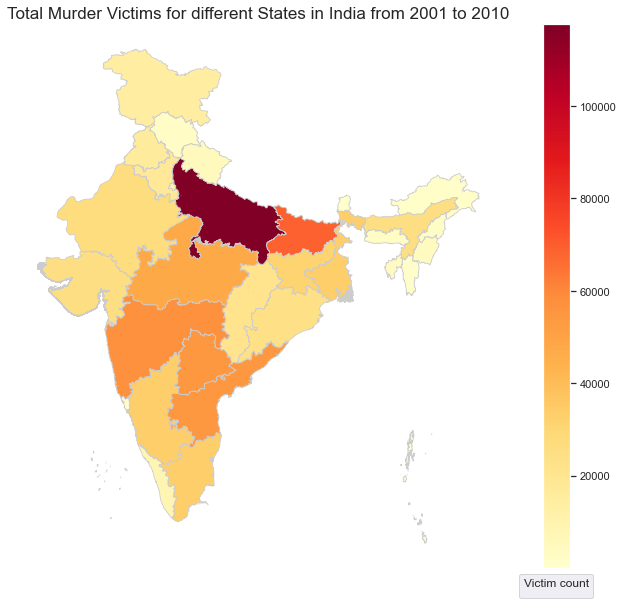

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis('off')
ax.set_title('Total Murder Victims for different States in India from 2001 to 2010', fontsize = 17)
geo_data_victims.plot(column = 'Total Victims', cmap = 'YlOrRd', 
           linewidth =0.8, 
           edgecolor = '0.8',
           ax = ax,
           legend = True)
plt.legend(title = 'Victim count', bbox_to_anchor=(1.2, 0))
fig.set_size_inches(15,10)
plt.show()

It is clear from the map that Uttar Pradesh and Bihar has higest victim count from 2001 and 2010, which
was evident from bar plot as well.

In [30]:
sub_group_victims = ds.groupby(['Area_Name','Sub_Group_Name']).Victims_Total.agg(['sum']).rename(columns = 
                                            {'sum':'Total Victims'}).reset_index()[['Area_Name',
                                                            'Sub_Group_Name','Total Victims']]

In [31]:
# forming total female victim data to plot from geopandas dataframe.
female_victims = sub_group_victims[sub_group_victims.Sub_Group_Name == 'Female Victims']
geo_data_f_victims = pd.merge(map_df,female_victims, left_on = 'st_nm',
         right_on = 'Area_Name', how = 'outer' )
geo_data_f_victims.set_index('st_nm', inplace = True)
geo_data_f_victims.fillna(geo_data_f_victims['Total Victims'].loc['Andhra Pradesh'], inplace = True)

In [32]:
geo_data_f_victims.sort_values('Total Victims', ascending = False)

No handles with labels found to put in legend.


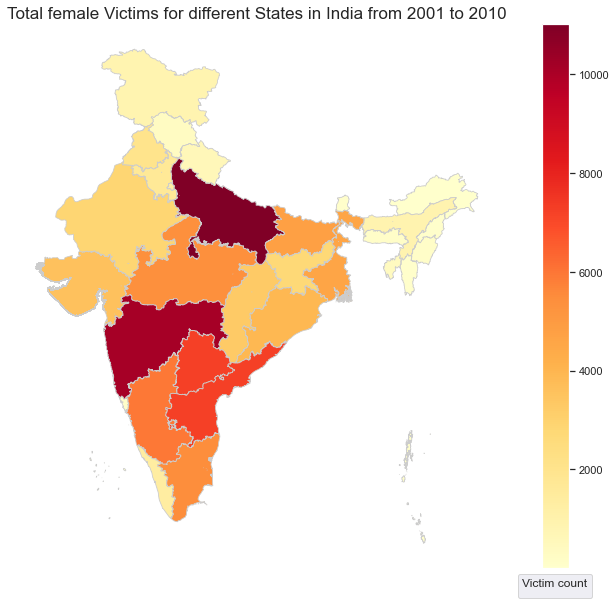

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis('off')
ax.set_title('Total female Victims for different States in India from 2001 to 2010', fontsize = 17)
geo_data_f_victims.plot(column = 'Total Victims', cmap = 'YlOrRd', 
           linewidth =0.8, 
           edgecolor = '0.8',
           ax = ax,
           legend = True)
plt.legend(title = 'Victim count', bbox_to_anchor=(1.2, 0))
fig.set_size_inches(15,10)
plt.show()

Here,again Uttar Pradesh tops the chart and although Maharashtra was not among top States in total victim count, but is 2nd highest state in crime against female followed by Andra Pradesh. 

In [44]:
minor_age_group_victims = ds.groupby(['Area_Name']).Victims_Upto_10_Yrs.agg(['sum'
                                        ]).sort_values('sum',ascending = False).rename(columns = 
                                            {'sum':'Total Victims'}).reset_index()[['Area_Name',
                                                          'Total Victims']]
minor_age_group_victims

,Area_Name,Total Victims
0,Maharashtra,3034.0
1,Gujarat,1506.0
2,Uttar Pradesh,1268.0
3,Karnataka,1090.0
4,Tamil Nadu,994.0
5,Kerala,934.0
6,Madhya Pradesh,862.0
7,Andhra Pradesh,688.0
8,Chhattisgarh,534.0
9,NCT of Delhi,456.0


In [45]:
# forming total victim (upto 10 yrs) data to plot from geopandas dataframe.
geo_data_minor_victims = pd.merge(map_df,minor_age_group_victims, left_on = 'st_nm',
         right_on = 'Area_Name', how = 'outer' )
geo_data_minor_victims.set_index('st_nm', inplace = True)
geo_data_minor_victims.fillna(geo_data_minor_victims['Total Victims'].loc['Andhra Pradesh'], inplace = True)

In [46]:
geo_data_minor_victims.sort_values('Total Victims', ascending = False)

No handles with labels found to put in legend.


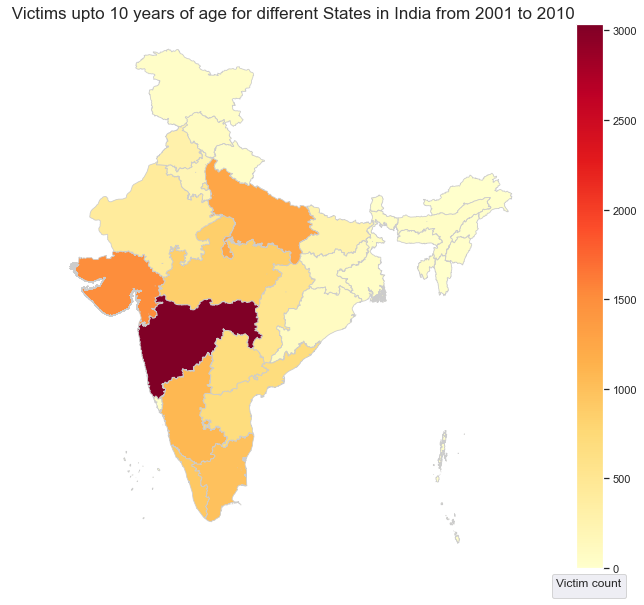

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis('off')
ax.set_title(' Victims upto 10 years of age for different States in India from 2001 to 2010', fontsize = 17)
geo_data_minor_victims.plot(column = 'Total Victims', cmap = 'YlOrRd', 
           linewidth =0.8, 
           edgecolor = '0.8',
           ax = ax,
           legend = True)
plt.legend(title = 'Victim count', bbox_to_anchor=(1.2, 0))
fig.set_size_inches(15,10)
plt.show()

We see Maharashtra again being highest State to report homocide for childrens upto 10 years of age.